In [1]:
# implement negative binomial regression

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

        

In [2]:
# load data
df = pd.read_csv('Pavement_with_crashes_2022.csv')


d:\Program Files\python\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (11,87,99,115,116,119,120,121,122,123,131,132,147,148,150,151,152,153,154,155,156,185,186,187,188,192,193,194,195,196,199,200,201,202,209,210,211,212,215,218,219,225) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Top 10 correlated features with Crashes
corr = df.corr()
print(corr['Crashes'].sort_values(ascending=False)[1:11], '\n')


BASTHK8          0.532394
LAYR8            0.485549
WIDTH            0.295514
AADT             0.287151
LANES            0.269252
IRI              0.220451
PATCHES          0.197953
JTSPALL_TRANS    0.173450
SURTHK2          0.169085
PATCH_PCT        0.144060
Name: Crashes, dtype: float64 



In [4]:
# considering AADT, SPEED, IRI as features
X = df[['AADT','SPEED','IRI']]
# X = df[['WIDTH','AADT','IRI','LANES','PATCHES']]
Y = df['Crashes']
# print nan values
print('nan values in X: ',X.isnull().sum())
print('nan values in Y: ',Y.isnull().sum())

# replace nan values with mean
X = X.fillna(X.mean())
Y = Y.fillna(Y.mean())

# print nan values
print('nan values in X: ',X.isnull().sum())
print('nan values in Y: ',Y.isnull().sum())
    


nan values in X:  AADT      2
SPEED     0
IRI      20
dtype: int64
nan values in Y:  0
nan values in X:  AADT     0
SPEED    0
IRI      0
dtype: int64
nan values in Y:  0


In [5]:
# negative binomial regression
model = sm.GLM(Y, X, family=sm.families.NegativeBinomial())
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Crashes   No. Observations:                 4119
Model:                            GLM   Df Residuals:                     4116
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8257.6
Date:                Mon, 06 Nov 2023   Deviance:                       5475.7
Time:                        17:57:08   Pearson chi2:                 6.69e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3400
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AADT           0.0001   2.68e-06     39.571      0.0

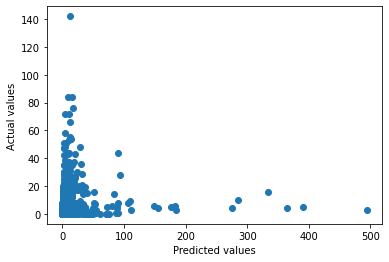

In [6]:
predicted = results.predict()
predicted = predicted.astype(int)
plt.scatter(predicted, Y)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()
    

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Crashes   No. Observations:                 4119
Model:                            GLM   Df Residuals:                     4116
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9949.3
Date:                Mon, 06 Nov 2023   Deviance:                       11244.
Time:                        17:57:09   Pearson chi2:                 1.66e+04
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6322
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AADT        8.947e-05   1.43e-06     62.585      0.0

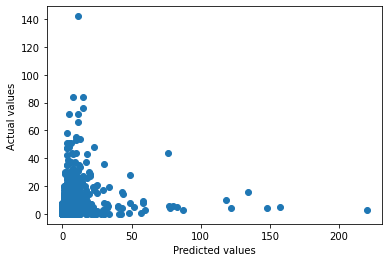

In [7]:
# negative binomial regression with alpha = 0.2
model = sm.GLM(Y, X, family=sm.families.NegativeBinomial(alpha=0.2))
results = model.fit()
print(results.summary())

# plot predicted values and actual values
predicted = results.predict()
# convert predicted values to integer
predicted = predicted.astype(int)
plt.scatter(predicted, Y)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

[ 0.00032671 -0.12729002  0.0145718 ]
6.1121647170974285


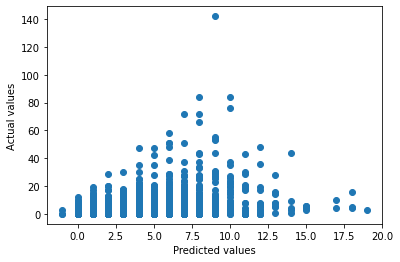

In [8]:
# Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)
print(regressor.coef_)
print(regressor.intercept_)
y_pred = regressor.predict(X)
y_pred = y_pred.astype(int)

# plot predicted values and actual values
plt.scatter(y_pred, Y)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()
    

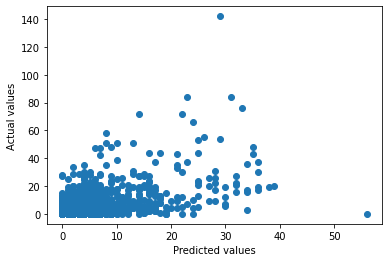

In [13]:
# polynomial regression
# here output should be greater than or equal to zero no negative values
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly, Y)
y_pred = regressor.predict(X_poly)
# no negative values
y_pred[y_pred < 0] = 0
y_pred = y_pred.astype(int)

# plot predicted values and actual values
plt.scatter(y_pred, Y)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()


